# Dataframes and Random Sampling

So far we have randomly sampled from a list or array. We can also randomly sample from dataframes! This is advantageous in the situation where we want to select a random subset of given data to build predictive models or to analyze.

Using a small example, we turn our six sixed die into a dataframe using the pandas dataframe call. Doing so, we see that this dataframe has 6 rows and 1 column.

In [3]:
import numpy as np
import pandas as pd

In [4]:
die = pd.DataFrame(
    {'Face': np.arange(1, 7)
    })
die

,Face
0,1
1,2
2,3
3,4
4,5
5,6


Similar to randomly selecting an option from a list, we can randomly sample from a dataframe by using the sample call in pandas. This randomly selects an entire row or rows from the dataframe. The input of 1 in the <code> die.sample(1) </code> denotes we want to select exactly one row. We can choose to sample more than one row by changing the input value. 

In [8]:
die.sample(1)

,Face
2,3


Some additional important arguments to this function include
 - allowing the option to sample with or without replacement (note <code>np.random.choice()</code> also has this argument!)
 - setting the random state

Setting the replace option to True allows us to sample the same row more than once. Essentially we are choosing a row, <i>replacing </i> it and choosing our next row from the original dataframe. Setting this option to False allows us to choose a row exactly once. The default in pandas is <code> replace = False. </code>

Setting the random state equal to some integer allows for reproducibility of results. This option still gives a random result, but keeping the random state the same allows us to choose the same random rows each time. Note for now this is not extremely important but will be useful for predictive modeling in the future! 


In [12]:
die.sample(10, replace=True, random_state=1)

,Face
5,6
3,4
4,5
0,1
1,2
3,4
5,6
0,1
0,1
1,2


Above we randomly selected 10 rows with replacement that corresponds to rolling the die 10 times. We can now visualize the results of these random samples using a histogram. This will give us an idea of the how often each number is rolled. If we only roll the die 12 times, some numbers appear with much greater frequency than others.

In [6]:
#note, starting the bins at 0.5 will give us bars centered nicely over the face numbers
roll_bins = np.arange(0.5, 7, 1)
roll_bins

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])

array([[<AxesSubplot:title={'center':'Face'}>]], dtype=object)

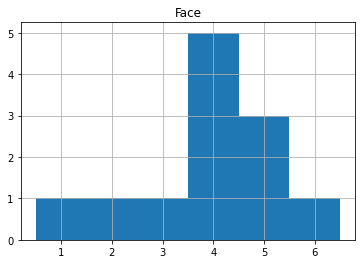

In [7]:
die.sample(12,replace=True).hist(bins = roll_bins)

Randomly sampling 1000 rolls of the die we start to see a more evenly distrbuted histogram.

array([[<AxesSubplot:title={'center':'Face'}>]], dtype=object)

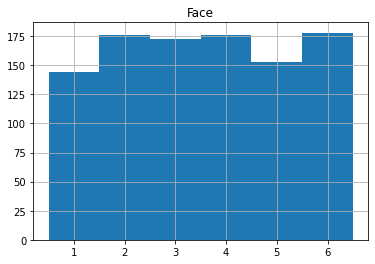

In [8]:
die.sample(1000,replace=True).hist(bins = roll_bins)

Let's see how the distribution changes as we increase the number of randomly sampled rolls of a six sided die.

array([[<AxesSubplot:title={'center':'Face'}>]], dtype=object)

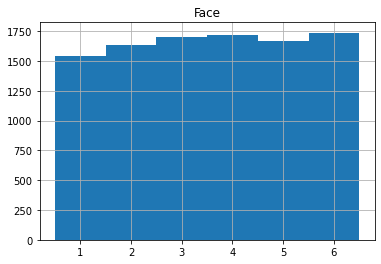

In [10]:
die.sample(10000,replace=True).hist(bins = roll_bins)

array([[<AxesSubplot:title={'center':'Face'}>]], dtype=object)

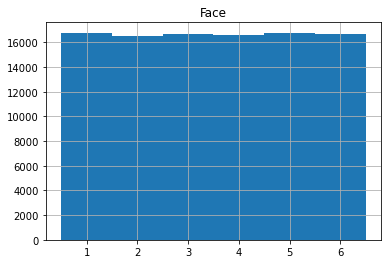

In [11]:
die.sample(100000,replace=True).hist(bins = roll_bins)

array([[<AxesSubplot:title={'center':'Face'}>]], dtype=object)

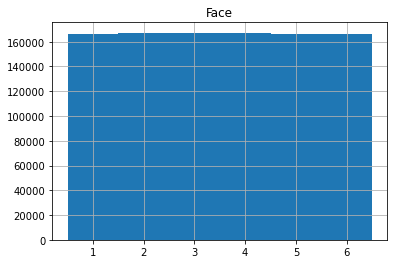

In [12]:
die.sample(1000000,replace=True).hist(bins = roll_bins)

As the number of samples increases, that is as we roll the die many many many times, we find that the each face of the die occurs roughly the same number of times. We will explain this in more detail in Chapter (chapter number here...law of large numbers or central limit theorem chapter?)